In [3]:
import sys
print(sys.executable)

import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

c:\Users\hp\Documents\Kifya-AI\time-series-forcasting-week11\.venv\Scripts\python.exe


In [4]:
ticker = 'TSLA'
start_date = "2015-07-01"
end_date = "2025-07-31"

tsla = yf.download(ticker, start=start_date, end=end_date)
tsla_close = tsla['Close']

C:\Users\hp\AppData\Local\Temp\ipykernel_21204\2793868105.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tsla = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


In [5]:
train_size = int(len(tsla_close) * 0.85)  # ~85% train, 15% test
train, test = tsla_close.iloc[:train_size], tsla_close.iloc[train_size:]

c:\Users\hp\Documents\Kifya-AI\time-series-forcasting-week11\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\hp\Documents\Kifya-AI\time-series-forcasting-week11\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\hp\Documents\Kifya-AI\time-series-forcasting-week11\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\hp\Documents\Kifya-AI\time-series-forcasting-week11\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\hp\Documents\Kifya-AI\time-seri

Best ARIMA parameters: (0, 1, 0)

ARIMA Performance:
MAE: 71.6147, RMSE: 94.9282, MAPE: nan%


c:\Users\hp\Documents\Kifya-AI\time-series-forcasting-week11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\Documents\Kifya-AI\time-series-forcasting-week11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\Documents\Kifya-AI\time-series-forcasting-week11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\hp\Documents\Kifya-AI\time-series-forcasting-week11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model

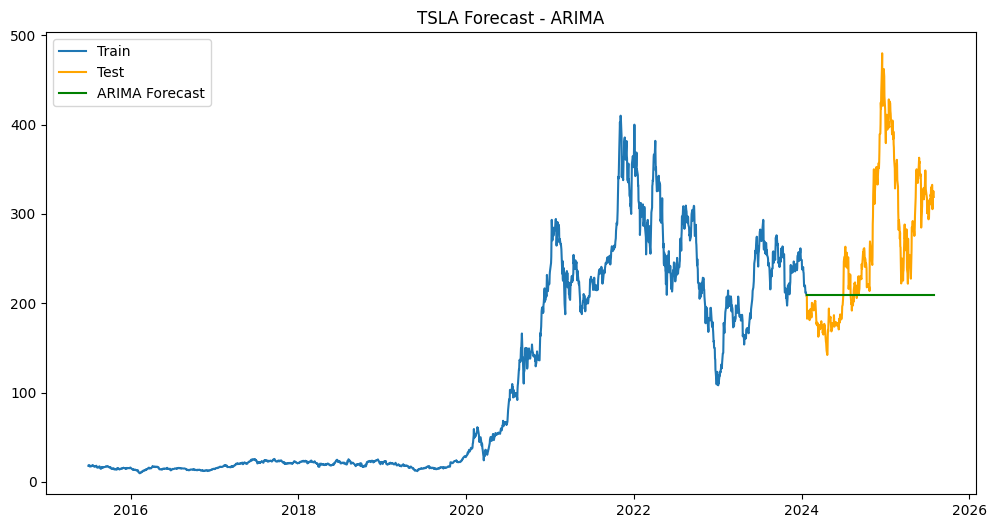

In [6]:
# Use auto_arima to find optimal parameters
auto_model = pm.auto_arima(train, seasonal=False, stepwise=True, suppress_warnings=True)
print("Best ARIMA parameters:", auto_model.order)

# Fit ARIMA with found params
arima_model = ARIMA(train, order=auto_model.order)
arima_result = arima_model.fit()

# Forecast over test period
arima_forecast = arima_result.forecast(steps=len(test))

# Evaluate ARIMA
arima_mae = mean_absolute_error(test, arima_forecast)
arima_rmse = sqrt(mean_squared_error(test, arima_forecast))
arima_mape = np.mean(np.abs((test - arima_forecast) / test)) * 100

print("\nARIMA Performance:")
print(f"MAE: {arima_mae:.4f}, RMSE: {arima_rmse:.4f}, MAPE: {arima_mape:.2f}%")

# Plot ARIMA predictions
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test', color='orange')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='green')
plt.legend()
plt.title("TSLA Forecast - ARIMA")
plt.show()

In [7]:
# Check for GPU
gpus = tf.config.list_physical_devices('GPU')
print("Num GPUs Available:", len(gpus))
if gpus:
    print("✅ Using GPU:", gpus[0])
else:
    print("⚠️ No GPU found, running on CPU.")

# Run training on GPU if available
device = "/GPU:0" if gpus else "/CPU:0"

Num GPUs Available: 0
⚠️ No GPU found, running on CPU.


Epoch 1/50


c:\Users\hp\Documents\Kifya-AI\time-series-forcasting-week11\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - loss: 0.0052 - val_loss: 0.0041
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0010 - val_loss: 0.0037
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 9.0891e-04 - val_loss: 0.0030
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 7.5750e-04 - val_loss: 0.0026
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 6.4285e-04 - val_loss: 0.0023
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 6.0654e-04 - val_loss: 0.0021
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 6.0748e-04 - val_loss: 0.0020
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 5.4695e-04 - val_loss: 0.0018
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 5.4403e-04 - val_loss: 0.0018
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 4.8186e-04 - val_loss: 0.0017
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 4.3800e-04 - val_loss: 0.0019
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━

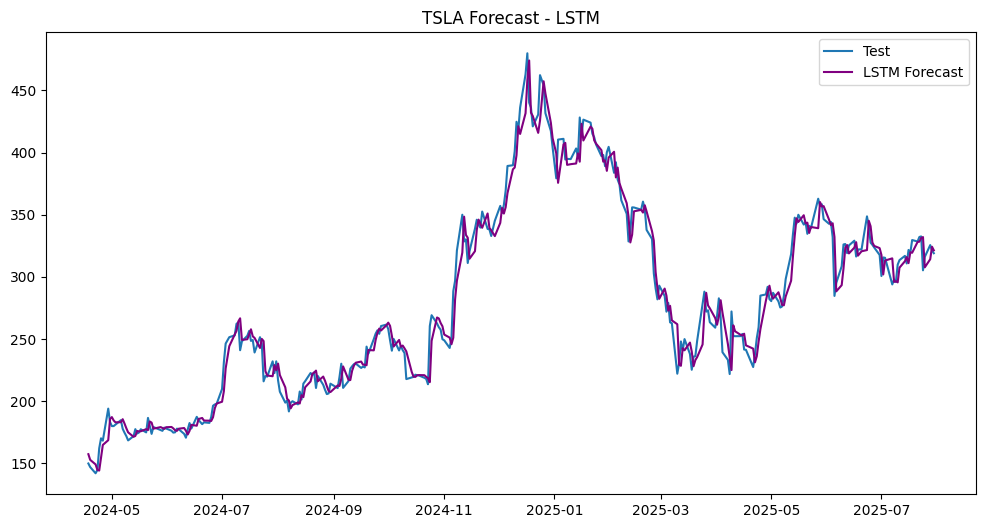

In [9]:
# Prepare data for LSTM (scaling + supervised format)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(tsla_close.values.reshape(-1, 1))

train_scaled = scaled_data[:train_size]
test_scaled = scaled_data[train_size:]

# Function to create sequences
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X_train, y_train = create_sequences(train_scaled, seq_length)
X_test, y_test = create_sequences(test_scaled, seq_length)

# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))

lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping
es = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit LSTM
with tf.device(device):
    history = lstm_model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=50,
        batch_size=32,
        callbacks=[es],
        verbose=1
    )


# Forecast with LSTM
lstm_predictions = lstm_model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluate LSTM
lstm_mae = mean_absolute_error(y_test_rescaled, lstm_predictions)
lstm_rmse = sqrt(mean_squared_error(y_test_rescaled, lstm_predictions))
lstm_mape = np.mean(np.abs((y_test_rescaled - lstm_predictions) / y_test_rescaled)) * 100

print("\nLSTM Performance:")
print(f"MAE: {lstm_mae:.4f}, RMSE: {lstm_rmse:.4f}, MAPE: {lstm_mape:.2f}%")

# Plot LSTM predictions
plt.figure(figsize=(12, 6))
plt.plot(tsla_close.index[train_size+seq_length:], y_test_rescaled, label='Test')
plt.plot(tsla_close.index[train_size+seq_length:], lstm_predictions, label='LSTM Forecast', color='purple')
plt.legend()
plt.title("TSLA Forecast - LSTM")
plt.show()

In [10]:
comparison_df = pd.DataFrame({
    'Model': ['ARIMA', 'LSTM'],
    'MAE': [arima_mae, lstm_mae],
    'RMSE': [arima_rmse, lstm_rmse],
    'MAPE (%)': [arima_mape, lstm_mape]
})

print("\nModel Performance Comparison:")
print(comparison_df)


Model Performance Comparison:
   Model        MAE       RMSE  MAPE (%)
0  ARIMA  71.614723  94.928239       NaN
1   LSTM   9.029140  12.519167  3.259533
